
**Étape 1 : Importation des librairies et chargement des données**

In [ ]:
!pip install -U numba visions ydata-profiling


In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [ ]:
df = pd.read_csv('dataset.csv')
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in df.columns:

    df[col] = df[col].str.replace('_',' ')
df.head(20)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,Hypertension,headache,chest pain,dizziness,loss of balance,lack of concentration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred and distorted vision,excessive hunger,drying and tingling lips,slurred speech,irritability,palpitations,NaN,NaN,NaN,NaN,NaN
765,Arthritis,muscle weakness,stiff neck,swelling joints,painful walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3751,Hepatitis B,itching,fatigue,lethargy,yellowish skin,dark urine,loss of appetite,abdominal pain,yellow urine,yellowing of eyes,malaise,receiving blood transfusion,receiving unsterile injections,NaN,NaN,NaN,NaN,NaN
4193,Migraine,acidity,indigestion,headache,blurred and distorted vision,excessive hunger,stiff neck,depression,irritability,visual disturbances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)
type(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


pandas.core.frame.DataFrame

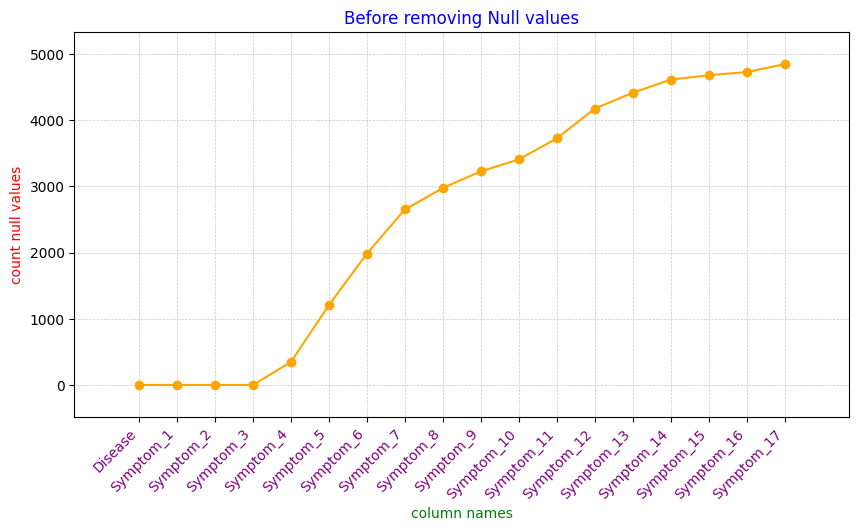

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'],color='orange', marker='o')
plt.xticks(null_checker.index, rotation=45,
horizontalalignment='right',color='purple')
plt.title('Before removing Null values',color='blue')
plt.xlabel('column names',color='green')
plt.ylabel('count null values',color='red')
plt.margins(0.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [ ]:
# Ce code nettoie un DataFrame en supprimant les espaces blancs inutiles au début et à la fin de chaque valeur de chaîne dans le DataFrame.
cols = df.columns
data = df[cols].values.flatten()#appl

s = pd.Series(data)
s = s.str.strip()#d ws
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

# Charger le fichier CSV
file_path = 'Symptom-severity.csv'  # Remplacez par le chemin de votre fichier
df = pd.read_csv(file_path)

# Vérification des poids initiaux
print("Poids initiaux :")
print(df.head())

# Ajustement minime des poids pour éviter les chevauchements
adjustment = 0.01  # Petite valeur pour différencier les poids similaires
seen_weights = {}

for index, row in df.iterrows():
    weight = row['weight']
    # Si le poids a déjà été vu, ajuster légèrement
    if weight in seen_weights:
        seen_weights[weight] += adjustment
        df.at[index, 'weight'] = seen_weights[weight]
    else:
        seen_weights[weight] = weight  # Conserver le poids tel quel la première fois

# Vérification des poids ajustés
print("Poids ajustés :")
print(df.head())

# Sauvegarder dans un nouveau fichier CSV
new_file_path = 'Symptom-severity-adjusted.csv'
df.to_csv(new_file_path, index=False)
print(f"Fichier ajusté enregistré sous : {new_file_path}")


Poids initiaux :
                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5
Poids ajustés :
                Symptom  weight
0               itching    1.00
1             skin_rash    3.00
2  nodal_skin_eruptions    4.00
3   continuous_sneezing    4.01
4             shivering    5.00
Fichier ajusté enregistré sous : Symptom-severity-adjusted.csv


<ipython-input-35-75bc368833dc>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.01' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'weight'] = seen_weights[weight]


In [ ]:
# Symptoms with its effect on body per two day.

#weight : level of effectiveness per 2 days.

df1 = pd.read_csv('Symptom-severity-adjusted.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head(24)
# len(df1.weight.unique())

,Symptom,weight
0,itching,1.00
1,skin rash,3.00
2,nodal skin eruptions,4.00
3,continuous sneezing,4.01
4,shivering,5.00
5,chills,3.01
6,joint pain,3.02
7,stomach pain,5.01
8,acidity,3.03
9,ulcers on tongue,4.02


In [ ]:
df1['Symptom'].unique()


array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()
symptoms
for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
print(vals)

d = pd.DataFrame(vals, columns=cols)
d.head()

[['Acne' 3.0 2.089999999999998 ... 0 0 0]
 ['Acne' 3.0 2.0799999999999983 ... 0 0 0]
 ['Hyperthyroidism' 4.029999999999999 3.0599999999999987 ... 0 0 0]
 ...
 ['Dengue' 3.0 3.01 ... 0 0 0]
 ['Fungal infection' 1.0 3.0 ... 0 0 0]
 ['Drug Reaction' 1.0 3.0 ... 0 0 0]]


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3.0,2.09,2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3.0,2.08,2.09,2.1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4.03,3.06,3.07,5.04,3.09,6.03,5.14,4.21,2.02,2.03,6.13,0,0,0,0,0,0
3,AIDS,3.04,6.02,7.0,5.23,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1.0,5.02,3.11,5.07,4.09,4.12,4.14,0,0,0,0,0,0,0,0,0,0


In [32]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

<ipython-input-32-6d5456d11e41>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = d.replace('foul smell of urine',0)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3.00,2.09,2.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,Acne,3.00,2.08,2.09,2.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,Hyperthyroidism,4.03,3.06,3.07,5.04,3.09,6.03,5.14,4.21,2.02,2.03,6.13,0.00,0.0,0.0,0.0,0.0,0.0
3,AIDS,3.04,6.02,7.00,5.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,Chronic cholestasis,1.00,5.02,3.11,5.07,4.09,4.12,4.14,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
5,Hypertension,3.10,7.02,4.17,4.25,3.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
6,Hypoglycemia,5.02,4.03,4.04,3.09,3.10,5.07,5.09,4.21,4.22,4.23,2.03,4.37,0.0,0.0,0.0,0.0,0.0
7,Arthritis,2.02,4.24,5.24,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
8,Hepatitis B,1.00,4.03,2.00,3.11,4.08,4.09,4.12,4.13,4.14,6.07,5.31,2.06,0.0,0.0,0.0,0.0,0.0
9,Migraine,3.03,5.06,3.10,5.09,4.21,4.24,3.15,2.03,3.18,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [33]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


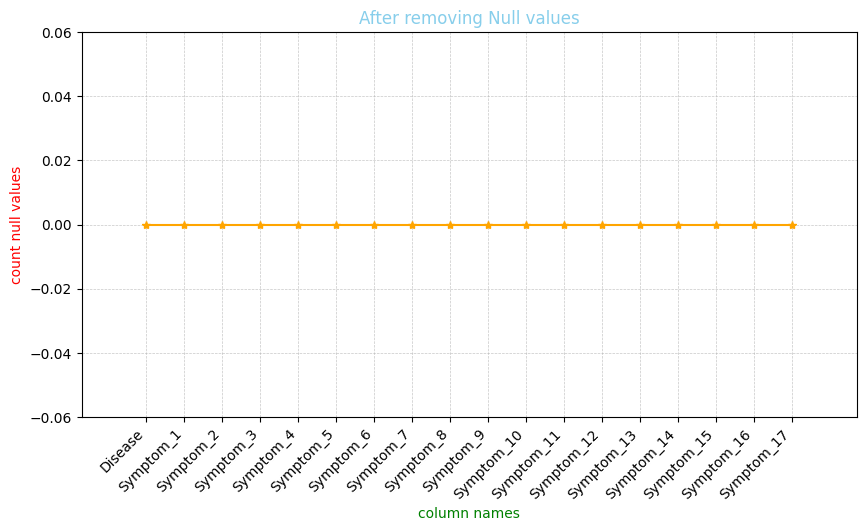

In [34]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'],color='orange', marker='*')
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values',color='skyblue')
plt.xlabel('column names',color='green')
plt.ylabel('count null values',color='red')
plt.margins(0.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [35]:
print("Symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Diseases that can be identified ",len(df['Disease'].unique()))

Symptoms used to identify the disease  132
Diseases that can be identified  41


In [36]:
df['Disease'].unique()


array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [37]:
data = df.iloc[:,1:].values
labels = df['Disease'].values


In [38]:
data.shape
labels.shape


(4920,)

In [39]:
data

array([[3.  , 2.09, 2.1 , ..., 0.  , 0.  , 0.  ],
       [3.  , 2.08, 2.09, ..., 0.  , 0.  , 0.  ],
       [4.03, 3.06, 3.07, ..., 0.  , 0.  , 0.  ],
       ...,
       [3.  , 3.01, 3.02, ..., 0.  , 0.  , 0.  ],
       [1.  , 3.  , 4.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 3.  , 5.01, ..., 0.  , 0.  , 0.  ]])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


[3.03 5.06 3.1  5.09 4.21 4.24 3.15 2.03 3.18 0.   0.   0.   0.   0.
 0.   0.   0.  ]
Migraine
[[16  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 21]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.94      0.89      0.91        18
                                   AIDS       1.00      1.00      1.00        20
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       1.00      1.00      1.00        29
                                Allergy       0.95      1.00      0.97        19
                              Arthritis       1.00      1.00      1.00        31
                       Bronchial Asthma       0.85      1.00      0.92        28
                   Cervical spondylosis       1.00      1.00      1.00        30
                   

<Axes: >

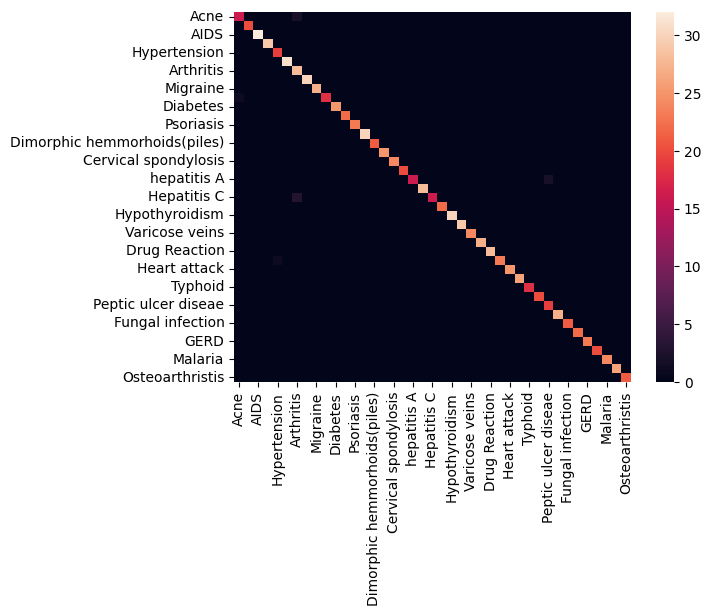

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,accuracy_score
# rfc=RandomForestClassifier(random_state=42)
# rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=100, max_depth=8)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
print(x_test[0])
print(preds[0])
conf_mat = confusion_matrix(y_test, preds)
print(conf_mat)
print(classification_report(y_test,preds))
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [42]:

# KFold est une technique très utilisée pour valider un modèle d'apprentissage automatique. Elle permet
# de mieux évaluer la performance d'un modèle en l'examinant sur plusieurs sous-ensembles des données,
# offrant ainsi une estimation plus stable et fiable de sa capacité à généraliser à de nouvelles données.
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 98.959%, Standard Deviation: (0.54%)


In [ ]:
# ========================= tester des nouvellews choses

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 97.456%, Standard Deviation: (1.31%)


In [ ]:
discrp = pd.read_csv("symptom_Description.csv")
discrp.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [ ]:
prec = pd.read_csv("symptom_precaution.csv")
prec.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [ ]:
joblib.dump(rnd_forest, "predictModel.joblib")


['predictModel.joblib']

In [ ]:
loaded_rf = joblib.load("predictModel.joblib")
